In [2]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath

# additional configuration (optional)
%config InlineBackend.figure_format = 'retina'

from dask.distributed import Client #client is the interface to
from dask.distributed import LocalCluster #Start the cluster locally
cluster = LocalCluster()
client = Client(cluster) #Connect the client to the c
client

/nbhome/Rebecca.Beadling/miniconda/envs/python38_latestxesmf/lib/python3.8/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 46534 instead
  warnings.warn(


Client Scheduler: tcp://127.0.0.1:35610 Dashboard: http://127.0.0.1:46534/status,Cluster Workers: 4 Cores: 8 Memory: 33.22 GB


### Load CM4 datasets

In [3]:
ds_static_ocean = xr.open_dataset('/net/rlb/subtropical_gyres/mode_water/ocean_monthly.static.nc')
ds_static_seaice = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ice.static.nc')

ds_sit_control = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ice.025101-040512.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sit_fafstress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_output/ice.000101-010012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sit_fafstress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_290/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sit_fafstress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_332/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])


ds_sit_fafantwaterstress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_output/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sit_fafantwaterstress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_290/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sit_fafantwaterstress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_332/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])

ds_sit_fafantwater_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_output/ice.000101-010012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sit_fafantwater_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_290/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])
ds_sit_fafantwater_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_332/ice.000101-007012.sithick.nc',
                    chunks={'time':20},drop_variables=['average_DT', 'average_T1', 'average_T2'])

### Compute Ensemble Mean Sea Ice Thickness for Years 51 to 70 and Thickness Anomalies relative to piControl

In [4]:
sit_control_mean = ds_sit_control['sithick'].sel(time=slice('0281-01-16','0380-12-16')).mean(dim='time')

### FAFSTRRESS
sit_fafstress_251_mean = ds_sit_fafstress_251['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafstress_290_mean = ds_sit_fafstress_290['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafstress_332_mean = ds_sit_fafstress_332['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')

fafstress_ensemble = xr.concat([sit_fafstress_251_mean,sit_fafstress_290_mean,sit_fafstress_332_mean],dim='member')
fafstress_ensemble_mean = fafstress_ensemble.mean(dim='member')
fafstress_ensemble_mean

### FAFANTWATERSTRRESS
sit_fafantwaterstress_251_mean = ds_sit_fafantwaterstress_251['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafantwaterstress_290_mean = ds_sit_fafantwaterstress_290['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafantwaterstress_332_mean = ds_sit_fafantwaterstress_332['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')

fafantwaterstress_ensemble = xr.concat([sit_fafantwaterstress_251_mean,sit_fafantwaterstress_290_mean,sit_fafantwaterstress_332_mean],dim='member')
fafantwaterstress_ensemble_mean = fafantwaterstress_ensemble.mean(dim='member')
fafantwaterstress_ensemble_mean

### FAFANTWATER
sit_fafantwater_251_mean = ds_sit_fafantwater_251['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafantwater_290_mean = ds_sit_fafantwater_290['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
sit_fafantwater_332_mean = ds_sit_fafantwater_332['sithick'].sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')

fafantwater_ensemble = xr.concat([sit_fafantwater_251_mean,sit_fafantwater_290_mean,sit_fafantwater_332_mean],dim='member')
fafantwater_ensemble_mean = fafantwater_ensemble.mean(dim='member')
fafantwater_ensemble_mean

###### Compute differences
difference_fafstress_ens = fafstress_ensemble_mean - sit_control_mean
difference_fafantwater_ens = fafantwater_ensemble_mean - sit_control_mean
difference_fafantwaterstress_ens = fafantwaterstress_ensemble_mean - sit_control_mean

difference_fafstress_251 = sit_fafstress_251_mean - sit_control_mean
difference_fafstress_290 = sit_fafstress_290_mean - sit_control_mean
difference_fafstress_332 = sit_fafstress_332_mean - sit_control_mean

difference_antwater_251 = sit_fafantwater_251_mean - sit_control_mean
difference_antwater_290 = sit_fafantwater_290_mean - sit_control_mean
difference_antwater_332 = sit_fafantwater_332_mean - sit_control_mean

difference_antwaterstress_251 = sit_fafantwaterstress_251_mean - sit_control_mean
difference_antwaterstress_290 = sit_fafantwaterstress_290_mean - sit_control_mean
difference_antwaterstress_332 = sit_fafantwaterstress_332_mean - sit_control_mean

### Function to set up Antarctic Polar Projection

In [5]:
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

depth = ds_static_ocean['deptho']
depth

shelf = depth.where(depth<1000)*0
shelf_mask = shelf.isin(0)

import matplotlib.ticker as mticker

def antarctic_map(ax, grid):
    ax.set_boundary(circle, transform=ax.transAxes)
    ax.set_extent([-180, 180, -90, -45], ccrs.PlateCarree())
    ax.contour(ds_static_ocean.xh,ds_static_ocean.yh,shelf_mask,colors='black',linewidths = 0.5,transform=ccrs.PlateCarree())
    if grid == True:
        gl = ax.gridlines(linewidth = 1, color = 'grey', linestyle = '--')
        gl.ylocator = mticker.FixedLocator([-90, -80, -70, -60, -50])

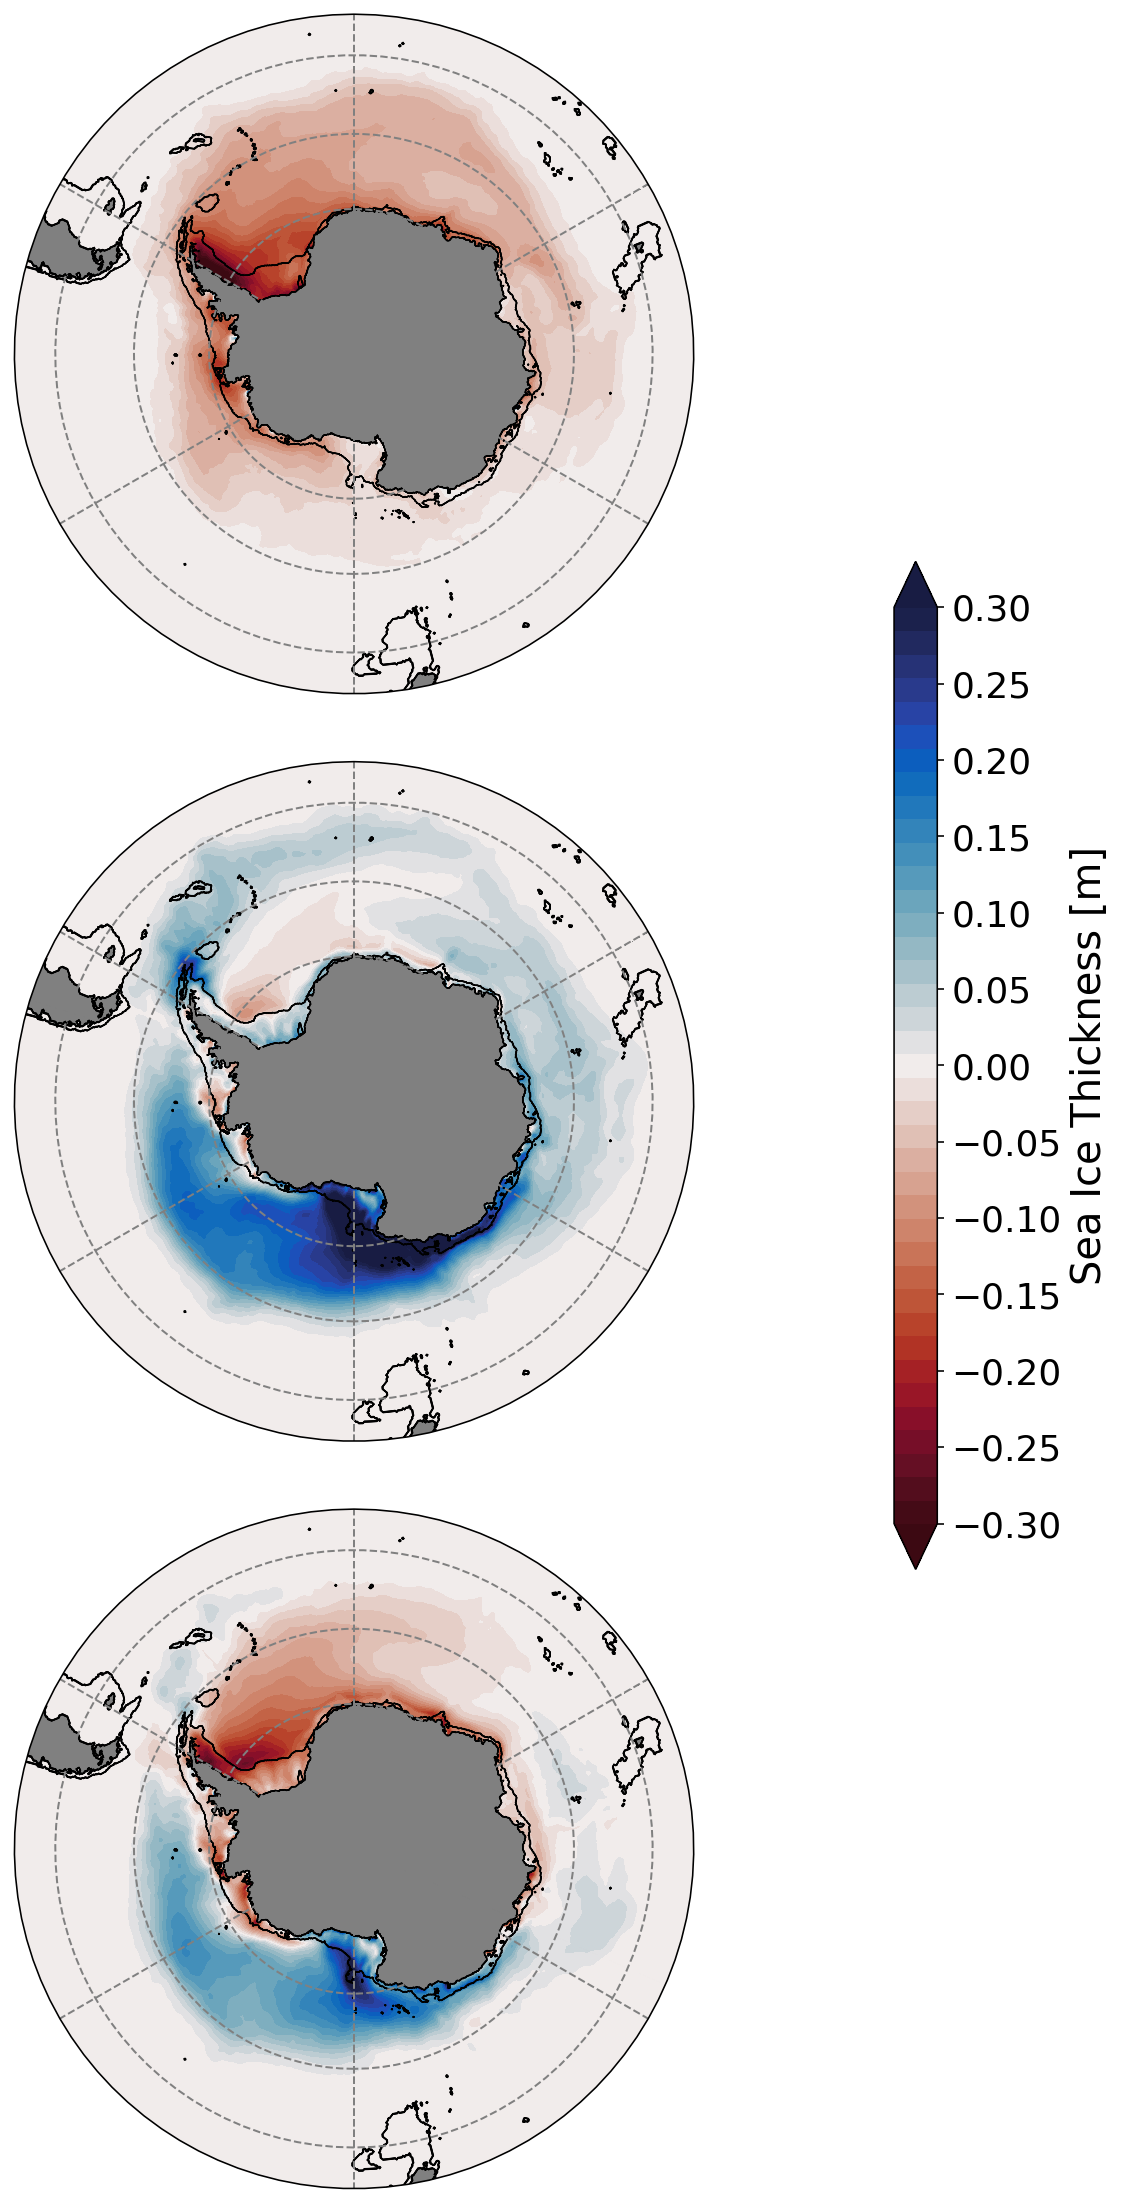

In [6]:
## Plot SSS global and polar projections
from matplotlib import gridspec

fig, ax  = plt.subplots(3,1, figsize = (20,20))
gs = gridspec.GridSpec(3,1)

ax0, ax1, ax2 = plt.subplot(gs[0,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[1,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),\
                plt.subplot(gs[2,0],projection=ccrs.SouthPolarStereo(),facecolor='grey'),
    

gs.update(hspace = 0.1, wspace = 0.01)

## Polar Projections
antarctic_map(ax0, grid = True)
antarctic_map(ax1, grid = True)
antarctic_map(ax2, grid = True)

x_seaice = ds_sit_control.xT.values
y_seaice = ds_sit_control.yT.values
xT,yT = np.meshgrid(x_seaice,y_seaice)

levels_seaice_diff = np.linspace(-0.3,0.3,40)

ax0.contourf(xT,yT,difference_fafstress_ens.values,
             levels=levels_seaice_diff,
             cmap=cmocean.cm.balance_r,
             transform=ccrs.PlateCarree(),extend='both')

ax1.contourf(xT,yT,difference_fafantwater_ens.values,
             levels=levels_seaice_diff,
             cmap=cmocean.cm.balance_r,
             transform=ccrs.PlateCarree(),extend='both')

ax2.contourf(xT,yT,difference_fafantwaterstress_ens.values,
             levels=levels_seaice_diff,
             cmap=cmocean.cm.balance_r,
             transform=ccrs.PlateCarree(),extend='both')

### Add Vertical Colorbar on Right
cbr_sit_diff = ax0.contourf(xT,yT,difference_fafstress_ens.values,
                            levels=levels_seaice_diff,
                            cmap=cmocean.cm.balance_r,
                            transform=ccrs.PlateCarree(),
                            extend='both')
cax = fig.add_axes([0.70, 0.34, 0.015, 0.35])

cbar_1=plt.colorbar(cbr_sit_diff,cax=cax,orientation='vertical',shrink=0.5,ticks = [-0.30,-0.25,-0.20,-0.15,-0.10,-0.05,0,0.05,0.10,0.15,0.20,0.25,0.30])
cbar_1.ax.tick_params(labelsize=18)
cbar_1.set_label('Sea Ice Thickness [m]', fontsize=20)

plt.savefig('CM4_Ensemble_Mean_SeaIce_Thickness_Anomalies.pdf')